In [41]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
import random
%matplotlib inline


In [42]:
class perseptron:
    
    def __init__(self, in_nodes, hide_nodes, out_nodes, learnspeed):
        self.i_n = in_nodes
        self.h_n = hide_nodes
        self.o_n = out_nodes
        
        self.ls = learnspeed
        
        self.wih = np.random.normal(0.0, pow(self.h_n, -0.5), (self.h_n, self.i_n))
        self.who = np.random.normal(0.0, pow(self.o_n, -0.5), (self.o_n, self.h_n))
        
        self.activate_func = lambda x : scipy.special.expit(x)
        pass
    
    def train(self, input_arr, target_arr):
        inputs = np.array(input_arr, ndmin=2).T
        targets = np.array(target_arr, ndmin=2).T
        
        hide_in = np.dot(self.wih, inputs)
        hide_out = self.activate_func(hide_in)
        
        last_in = np.dot(self.who, hide_out)
        last_out = self.activate_func(last_in)
        
        out_err = targets - last_out
        hide_err = np.dot(self.who.T, out_err)
        
        self.who += self.ls * np.dot((out_err * last_out * (1.0 - last_out)), np.transpose(hide_out))
        self.wih += self.ls * np.dot((hide_err * hide_out * (1.0 - hide_out)), np.transpose(inputs))

        pass
    
    def query(self, input_arr):
        inputs = np.array(input_arr, ndmin=2).T
        
        hide_in = np.dot(self.wih, inputs)
        hide_out = self.activate_func(hide_in)
        
        last_in = np.dot(self.who, hide_out)
        last_out = self.activate_func(last_in)
        
        return last_out
    

In [43]:
in_nodes = 784
hide_nodes = 100
out_nodes = 10

learnspeed = 0.1
epochs = 3

p = perseptron(in_nodes, hide_nodes, out_nodes, learnspeed)

In [44]:
training_data_file = open("mnist/train_data.csv", 'r')
training_data_arr = training_data_file.readlines()
training_data_file.close()

In [45]:
for e in range(epochs):
    random.shuffle(training_data_arr)
    for element in training_data_arr:
        all_val = element.split(',')
        input_arr = (np.asfarray(all_val[1:]) / 255.0 * 0.99) + 0.01
        target_arr = np.zeros(out_nodes) + 0.01
        target_arr[int(all_val[0])] = 0.99
        p.train(input_arr, target_arr)

In [46]:
test_data_file = open("mnist/test_data.csv", 'r')
test_data_arr = test_data_file.readlines()
test_data_file.close()

In [47]:
counter = []

for element in test_data_arr:
    all_val = element.split(',')
    correct = int(all_val[0])
    input_arr = (np.asfarray(all_val[1:]) / 255.0 * 0.99) + 0.01
    output_arr = p.query(input_arr)
    response = np.argmax(output_arr)
    if (response == correct):
        counter.append(1)
    else:
        counter.append(0)

In [48]:
counter_arr = np.asarray(counter)
eff = counter_arr.sum() / counter_arr.size
print("Эффективность =", eff)

Эффективность = 0.9659


In [10]:
# Пробую распознать свою картинку с цифрой
# Пробую распознать свою картинку с цифрой
# Пробую распознать свою картинку с цифрой
# Пробую распознать свою картинку с цифрой
# Пробую распознать свою картинку с цифрой
# Пробую распознать свою картинку с цифрой
# Пробую распознать свою картинку с цифрой
# Пробую распознать свою картинку с цифрой
# Пробую распознать свою картинку с цифрой
# Пробую распознать свою картинку с цифрой

import imageio
img_file_name = 'mnist_dataset/3.png'
img_array = imageio.imread(img_file_name, as_gray=True)
img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01
label = 3
record = np.append(label, img_data)
print(record)

[3.   0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 1.   1.   1.
 1.   1.   0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 1.   1.   1.   1.   0.01 0.01
 0.01 0.01 1.   1.   1.   0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 1.   0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 1.   1.   0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 1.   0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 1.   1.   0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.

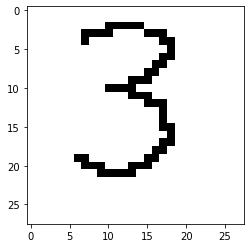

In [11]:
plt.imshow(img_data.reshape(28,28), cmap='Greys', interpolation='None')

In [12]:
correct_label = record[0]
inputs = record[1:]
outputs = n.query(inputs)
print(outputs)
label = np.argmax(outputs)
print('Ответ сети =', label)
if(label == correct_label):
    print('Нейросеть дала правильный ответ!')
else:
    print('Нейросети надо еще раз потренироваться...')

[[2.21140334e-04]
 [2.14898801e-02]
 [4.17150555e-03]
 [6.18808931e-01]
 [1.15985094e-04]
 [3.71348278e-01]
 [5.40532645e-03]
 [1.05788945e-02]
 [1.97610992e-03]
 [1.09067935e-02]]
Ответ сети = 3
Нейросеть дала правильный ответ!


[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

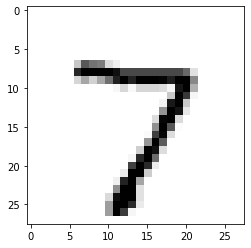

In [14]:
# как выглядят цифры из mnist


test_data_file = open("mnist_dataset/mnist_test_10.csv")
test_data_list = test_data_file.readlines()
test_data_file.close()

content_array = []

for record in test_data_list:
    all_values = record.split(',')
    content = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    content_array.append(content)
    # plt.imshow(content.reshape(28,28), cmap='Greys', interpolation='None')

plt.imshow(content_array[0].reshape(28,28), cmap='Greys', interpolation='None')
print(content_array[0])   